In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import re, string

In [ ]:
pip install emoji --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.9 MB/s eta 0:00:00


In [ ]:
import emoji

In [ ]:
import nltk

In [ ]:
from sklearn import preprocessing

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.4 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertModel

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
seed=42

In [ ]:
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)

<ipython-input-20-4302b4a3f031>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 640x480 with 0 Axes>

In [ ]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(5,5))
    labels=['Negative', 'Neutral', 'Positive']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=17)
    ax.yaxis.set_ticklabels(labels, fontsize=17)
    ax.set_ylabel('Test', fontsize=20)
    ax.set_xlabel('Predicted', fontsize=20)
    plt.show()

In [ ]:
df = pd.read_csv('/content/Corona_NLP_train.csv',encoding='ISO-8859-1')
df_test = pd.read_csv('/content/Corona_NLP_test.csv')

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16/03/2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16/03/2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16/03/2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16/03/2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16/03/2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       999 non-null    int64 
 1   ScreenName     999 non-null    int64 
 2   Location       793 non-null    object
 3   TweetAt        999 non-null    object
 4   OriginalTweet  999 non-null    object
 5   Sentiment      999 non-null    object
dtypes: int64(2), object(4)
memory usage: 47.0+ KB


In [ ]:
df['TweetAt'] = pd.to_datetime(df['TweetAt'])

<ipython-input-25-45b9b0fe6852>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['TweetAt'] = pd.to_datetime(df['TweetAt'])


In [ ]:
df.drop_duplicates(subset='OriginalTweet',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       999 non-null    int64         
 1   ScreenName     999 non-null    int64         
 2   Location       793 non-null    object        
 3   TweetAt        999 non-null    datetime64[ns]
 4   OriginalTweet  999 non-null    object        
 5   Sentiment      999 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 54.6+ KB


In [ ]:
pip install matplotlib --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 54.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


<ipython-input-29-8322cd35dd7d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x='index', y='counts', data=tweets_per_day, edgecolor='black',ci=False, palette='Blues_r')


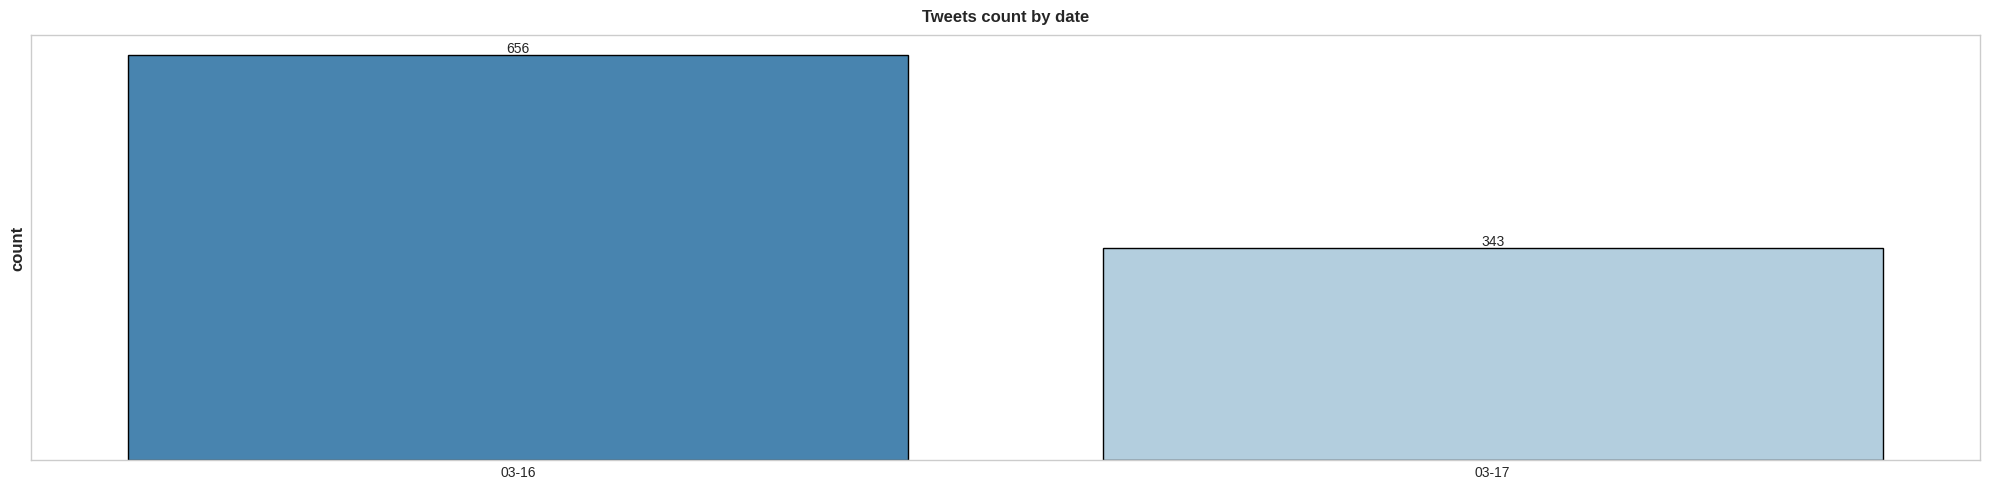

In [ ]:
tweets_per_day = df['TweetAt'].dt.strftime('%m-%d').value_counts().sort_index().reset_index(name='counts')
plt.figure(figsize=(20,5))
ax = sns.barplot(x='index', y='counts', data=tweets_per_day, edgecolor='black',ci=False, palette='Blues_r')
plt.title('Tweets count by date')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

In [ ]:
tweets_per_country = df['Location'].value_counts().loc[lambda x : x > 100].reset_index(name='counts')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='index', y='counts', data=tweets_per_country, edgecolor='black',ci=False, palette='Spectral')
plt.title('Tweets count by country')
plt.xticks(rotation=70)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()





<ipython-input-32-65f7d7c631af>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x='index', y='counts', data=tweets_per_country, edgecolor='black',ci=False, palette='Spectral')


ValueError: ignored

<Figure size 1500x600 with 0 Axes>

<ipython-input-33-2408f5755935>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_clean'] = texts_new
<ipython-input-33-2408f5755935>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['text_clean'] = texts_new_test
<ipython-input-33-2408f5755935>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

0                                                and and
1      advice talk to your neighbours family to excha...
2      coronavirus australia woolworths to give elder...
3      my food stock is not the only one which is emp...
4      me ready to go at supermarket during the covid...
                             ...                        
994    hear me out a new reality cooking show called ...
995    connectivity is essential during times of cris...
996    wells fargo is committed to helping customers ...
997    wells fargo is committed to helping customers ...
998    wells fargo is committed to helping customers ...
Name: text_clean, Length: 999, dtype: object
0      trending new yorkers encounter empty supermark...
1      when i couldnt find hand sanitizer at fred mey...
2      find out how you can protect yourself and love...
3      panic buying hits newyork city as anxious shop...
4      toiletpaper dunnypaper coronavirus coronavirus...
                             ...           

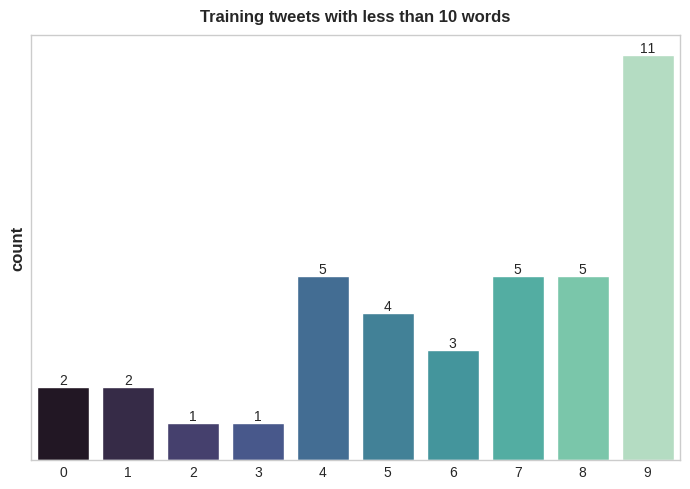

 DF SHAPE: (999, 4)
 DF TEST SHAPE: (1000, 4)
 DF SHAPE: (988, 4)
 DF TEST SHAPE: (1000, 4)


MAX TOKENIZED SENTENCE LENGTH: 70
MAX TOKENIZED SENTENCE LENGTH: 96
INDEX: 286, TEXT: so hard to decide as much as i want to hodl my 2 ccdcv4 token our place is declared to lock down due to covid19 i will use this to buy some food to stock txnid093bd1db0c0d3a62af15883138a5f57d4cef35ae14e31e602b74489dd2524c7f my b
INDEX: 345, TEXT: informoval jsem zstupce vech obchodnch etzc o aktulnch opatench vldy etzce jsou zsobovny na 95 take nen dvod panikait zsoby potravin fakt nedojdou nen opravdu dvod dnes obsadit a vykoupit supermarkety


In [ ]:
df = df[['OriginalTweet','Sentiment']]
df_test = df_test[['OriginalTweet','Sentiment']]

import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower()
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet))
    return new_tweet2

def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

texts_new = []
for t in df.OriginalTweet:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(remove_emojis(t))))))

texts_new_test = []
for t in df_test.OriginalTweet:
    texts_new_test.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(remove_emojis(t))))))

df['text_clean'] = texts_new
df_test['text_clean'] = texts_new_test

print(df['text_clean'])
print(df_test['text_clean'])
print(df['text_clean'][1:8].values)

text_len = []
for text in df.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)


df['text_len'] = text_len

text_len_test = []
for text in df_test.text_clean:
    tweet_len = len(text.split())
    text_len_test.append(tweet_len)

df_test['text_len'] = text_len_test

plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Training tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

print(f" DF SHAPE: {df.shape}")
print(f" DF TEST SHAPE: {df_test.shape}")

df = df[df['text_len'] > 4]

df_test = df_test[df_test['text_len'] > 4]


print(f" DF SHAPE: {df.shape}")
print(f" DF TEST SHAPE: {df_test.shape}")

tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

token_lens = []

for txt in df['text_clean'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)

print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

token_lens = []

for i,txt in enumerate(df['text_clean'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")

df['token_lens'] = token_lens

df = df.sort_values(by='token_lens', ascending=False)
df.head(20)

df = df.iloc[12:]
df.head()

df = df.sample(frac=1).reset_index(drop=True)



token_lens_test = []

for txt in df_test['text_clean'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))

max_len=np.max(token_lens_test)

print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")


token_lens_test = []

for i,txt in enumerate(df_test['text_clean'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")

df_test['token_lens'] = token_lens_test

df_test = df_test.sort_values(by='token_lens', ascending=False)
df_test.head(10)


df_test = df_test.iloc[5:]
df_test.head(3)

df_test = df_test.sample(frac=1).reset_index(drop=True)

# df['Sentiment'].value_counts()

# df['Sentiment'] = df['Sentiment'].map({'Extremely Negative':0,'Negative':0,'Neutral':1,'Positive':2,'Extremely Positive':2})


# df_test['Sentiment'] = df_test['Sentiment'].map({'Extremely Negative':0,'Negative':0,'Neutral':1,'Positive':2,'Extremely Positive':2})



# df['Sentiment'].value_counts()
# ros = RandomOverSampler()
# train_x, train_y = ros.fit_resample(np.array(df['text_clean']).reshape(-1, 1), np.array(df['Sentiment']).reshape(-1, 1));
# train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text_clean', 'Sentiment']);
# train_os['Sentiment'].value_counts()

# X = train_os['text_clean'].values
# y = train_os['Sentiment'].values

# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=seed)

# X_test = df_test['text_clean'].values
# y_test = df_test['Sentiment'].values




# y_train_le = y_train.copy()
# y_valid_le = y_valid.copy()
# y_test_le = y_test.copy()



# ohe = preprocessing.OneHotEncoder()
# y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
# y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
# y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()


# print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )



# clf = CountVectorizer()
# X_train_cv =  clf.fit_transform(X_train)
# X_test_cv = clf.transform(X_test)



# tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
# X_train_tf = tf_transformer.transform(X_train_cv)
# X_test_tf = tf_transformer.transform(X_test_cv)


# nb_clf = MultinomialNB()

# nb_clf.fit(X_train_tf, y_train_le)


In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')


In [ ]:
token_lens = []

for txt in df['text_clean'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)

In [ ]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")


MAX TOKENIZED SENTENCE LENGTH: 62


In [ ]:
token_lens = []

for i,txt in enumerate(df['text_clean'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")


In [ ]:
df['token_lens'] = token_lens


In [ ]:
df = df.sort_values(by='token_lens', ascending=False)
df.head(20)

,OriginalTweet,Sentiment,text_clean,text_len,token_lens
652,So food banks are now closing because they can...,Negative,so food banks are now closing because they can...,45,62
40,For a long time we could only dream of what Re...,Extremely Positive,for a long time we could only dream of what re...,56,62
233,With all due Respect to @PMOIndia @narendramod...,Extremely Negative,with all due respect to to bring consumer prot...,46,62
441,While #handsanitizers are empty in many stores...,Positive,while handsanitizers are empty in many stores ...,42,62
592,ItÂs crazy to work at a place like Trader Joe...,Negative,its crazy to work at a place like trader joes ...,52,62
963,I haven't tweeted at all about #COVID2019 beca...,Extremely Positive,i havent tweeted at all about covid2019 becaus...,53,62
506,It's fringing idiots like him who have caused ...,Positive,its fringing idiots like him who have caused p...,43,62
5,So I have been to @sainsburys badger farm and ...,Extremely Negative,so i have been to badger farm and into winches...,48,62
188,I haven't panicked bought &amp; only have enou...,Extremely Negative,i havent panicked bought amp only have enough ...,55,62
62,Dropped by Trader JoeÂs to pick up some salad...,Extremely Negative,dropped by trader joes to pick up some salads ...,45,61


In [ ]:
df = df.iloc[12:]
df.head()

,OriginalTweet,Sentiment,text_clean,text_len,token_lens
918,Covid-19 isnÂt a joke. IÂm well aware this i...,Negative,covid19 isnt a joke im well aware this is an i...,53,61
134,"If #CoronaVirus has shown us anything, it's wh...",Extremely Negative,if coronavirus has shown us anything its what ...,46,60
452,IÂm emotionally exhausted from #COVID2019. I ...,Negative,im emotionally exhausted from covid2019 i work...,52,60
370,How cruel of you to not go forward with closin...,Extremely Negative,how cruel of you to not go forward with closin...,53,60
423,I would love to practice social distancing but...,Extremely Positive,i would love to practice social distancing but...,52,60


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
token_lens_test = []

for txt in df_test['text_clean'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))

max_len=np.max(token_lens_test)

In [ ]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 67


In [ ]:
token_lens_test = []

for i,txt in enumerate(df_test['text_clean'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")

In [ ]:
df_test['token_lens'] = token_lens_test

In [ ]:
df_test = df_test.sort_values(by='token_lens', ascending=False)
df_test.head(10)

,OriginalTweet,Sentiment,text_clean,text_len,token_lens
46,"All these years, ppl looked at me like a freak...",Positive,all these years ppl looked at me like a freak ...,45,67
671,Dont let be lumped in with Toliet paper users...,Neutral,dont let be lumped in with toliet paper users ...,30,67
865,NYC Water. IS CVS PRICE GOUGING? IS THEIR MASS...,Extremely Negative,nyc water is cvs price gouging is their mass p...,43,66
209,Reporting on COVID-19 Has to stop Many times y...,Positive,reporting on covid19 has to stop many times yo...,53,66
586,$SPY GO OUT AND STOCK UP ON FOOD AND WATER PEO...,Extremely Positive,spy go out and stock up on food and water peop...,39,66
624,I just checked my surgical mask stash:\r\r\nI ...,Negative,i just checked my surgical mask stash i have 5...,49,66
698,Stock up on Food &amp; Water asap before the f...,Negative,stock up on food amp water asap before the for...,41,65
659,MODERN SHIPPING CONTAINER STALLS AT DISCOUNTED...,Extremely Positive,modern shipping container stalls at discounted...,30,65
655,1/25 Part 1 - Why does soap work so well on th...,Negative,125 part 1 why does soap work so well on the s...,45,65
600,My German colleagues have confirmed that Hamst...,Negative,my german colleagues have confirmed that hamst...,39,65


In [ ]:
df_test = df_test.iloc[5:]
df_test.head(3)

,OriginalTweet,Sentiment,text_clean,text_len,token_lens
624,I just checked my surgical mask stash:\r\r\nI ...,Negative,i just checked my surgical mask stash i have 5...,49,66
698,Stock up on Food &amp; Water asap before the f...,Negative,stock up on food amp water asap before the for...,41,65
659,MODERN SHIPPING CONTAINER STALLS AT DISCOUNTED...,Extremely Positive,modern shipping container stalls at discounted...,30,65


In [ ]:
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [ ]:
df['Sentiment'].value_counts()

Negative              263
Positive              250
Neutral               156
Extremely Negative    154
Extremely Positive    141
Name: Sentiment, dtype: int64

In [ ]:
df['Sentiment'] = df['Sentiment'].map({'Extremely Negative':0,'Negative':0,'Neutral':1,'Positive':2,'Extremely Positive':2})

In [ ]:
df_test['Sentiment'] = df_test['Sentiment'].map({'Extremely Negative':0,'Negative':0,'Neutral':1,'Positive':2,'Extremely Positive':2})

In [ ]:
df['Sentiment'].value_counts()

0    417
2    391
1    156
Name: Sentiment, dtype: int64

In [ ]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df['text_clean']).reshape(-1, 1), np.array(df['Sentiment']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text_clean', 'Sentiment']);

In [ ]:
train_os['Sentiment'].value_counts()

2    417
1    417
0    417
Name: Sentiment, dtype: int64

In [ ]:
X = train_os['text_clean'].values
y = train_os['Sentiment'].values

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=seed)

In [ ]:
X_test = df_test['text_clean'].values
y_test = df_test['Sentiment'].values

In [ ]:
y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

In [ ]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [ ]:
print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 1125
VALIDATION DATA: 126
TESTING DATA: 990


In [ ]:
clf = CountVectorizer()
X_train_cv =  clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)

In [ ]:
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

In [ ]:
nb_clf = MultinomialNB()

In [ ]:
nb_clf.fit(X_train_tf, y_train_le)

MultinomialNB()

In [ ]:
nb_pred = nb_clf.predict(X_test_tf)

In [ ]:
print('\tClassification Report for Naive Bayes:\n\n',classification_report(y_test_le,nb_pred, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for Naive Bayes:

               precision    recall  f1-score   support

    Negative       0.63      0.64      0.64       444
     Neutral       0.34      0.34      0.34       150
    Positive       0.61      0.60      0.60       396

    accuracy                           0.58       990
   macro avg       0.53      0.53      0.53       990
weighted avg       0.58      0.58      0.58       990



In [ ]:
MAX_LEN=128

In [ ]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [ ]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
def create_model(bert_model, max_len=MAX_LEN):

    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')

    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')

    embeddings = bert_model([input_ids,attention_masks])[1]

    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)

    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)

    model.compile(opt, loss=loss, metrics=accuracy)


    return model

In [ ]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [ ]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=32)

Epoch 1/4
36/36 [==============================] - 1627s 44s/step - loss: 1.0560 - categorical_accuracy: 0.4470 - val_loss: 0.9674 - val_categorical_accuracy: 0.5840
Epoch 2/4
36/36 [==============================] - 1636s 45s/step - loss: 0.8870 - categorical_accuracy: 0.6002 - val_loss: 0.8287 - val_categorical_accuracy: 0.6800
Epoch 3/4
36/36 [==============================] - 1623s 45s/step - loss: 0.6819 - categorical_accuracy: 0.7177 - val_loss: 0.7177 - val_categorical_accuracy: 0.7120
Epoch 4/4
36/36 [==============================] - 1612s 45s/step - loss: 0.4716 - categorical_accuracy: 0.8264 - val_loss: 0.6288 - val_categorical_accuracy: 0.7520


In [ ]:
result_bert = model.predict([test_input_ids,test_attention_masks])

31/31 [==============================] - 416s 13s/step


In [ ]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

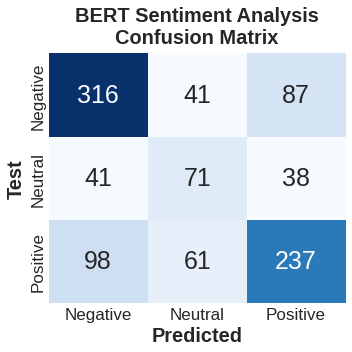

In [ ]:
conf_matrix(y_test.argmax(1), y_pred_bert.argmax(1),'BERT Sentiment Analysis\nConfusion Matrix')

In [ ]:
print('\tClassification Report for BERT:\n\n',classification_report(y_test,y_pred_bert, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for BERT:

               precision    recall  f1-score   support

    Negative       0.69      0.71      0.70       444
     Neutral       0.41      0.47      0.44       150
    Positive       0.65      0.60      0.63       396

   micro avg       0.63      0.63      0.63       990
   macro avg       0.59      0.59      0.59       990
weighted avg       0.64      0.63      0.63       990
 samples avg       0.63      0.63      0.63       990



In [ ]:
tokenizer_roberta = RobertaTokenizerFast.from_pretrained("roberta-base")

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [ ]:
token_lens = []

for txt in X_train:
    tokens = tokenizer_roberta.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
max_length=np.max(token_lens)
max_length

64

In [ ]:
MAX_LEN=128

In [ ]:
def tokenize_roberta(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer_roberta.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [ ]:
train_input_ids, train_attention_masks = tokenize_roberta(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize_roberta(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize_roberta(X_test, MAX_LEN)

In [ ]:
def create_model(bert_model, max_len=MAX_LEN):

    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()

    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    output = bert_model([input_ids,attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(3, activation=tf.nn.softmax)(output)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(opt, loss=loss, metrics=accuracy)
    return model

In [ ]:
roberta_model = TFRobertaModel.from_pretrained('roberta-base')

Downloading:   0%|          | 0.00/657M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
model = create_model(roberta_model, MAX_LEN)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_3[0][0]',                
 el)                            thPoolingAndCrossAt               'input_4[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                         

In [ ]:
history_2 = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=30)

Epoch 1/4
38/38 [==============================] - 1618s 42s/step - loss: 1.0977 - categorical_accuracy: 0.4078 - val_loss: 1.0681 - val_categorical_accuracy: 0.3440
Epoch 2/4
38/38 [==============================] - 1590s 42s/step - loss: 0.9229 - categorical_accuracy: 0.5708 - val_loss: 0.8145 - val_categorical_accuracy: 0.6480
Epoch 3/4
38/38 [==============================] - 1592s 42s/step - loss: 0.6153 - categorical_accuracy: 0.7418 - val_loss: 0.7543 - val_categorical_accuracy: 0.6960
Epoch 4/4
38/38 [==============================] - 1597s 42s/step - loss: 0.3970 - categorical_accuracy: 0.8379 - val_loss: 0.7270 - val_categorical_accuracy: 0.7440


In [ ]:
result_roberta = model.predict([test_input_ids,test_attention_masks])

31/31 [==============================] - 422s 13s/step


In [ ]:
y_pred_roberta =  np.zeros_like(result_roberta)
y_pred_roberta[np.arange(len(y_pred_roberta)), result_roberta.argmax(1)] = 1

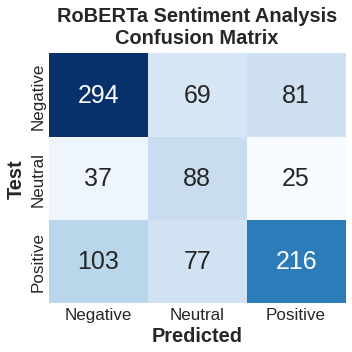

In [ ]:
conf_matrix(y_test.argmax(1),y_pred_roberta.argmax(1),'RoBERTa Sentiment Analysis\nConfusion Matrix')

In [ ]:
print('\tClassification Report for RoBERTa:\n\n',classification_report(y_test,y_pred_roberta, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for RoBERTa:

               precision    recall  f1-score   support

    Negative       0.68      0.66      0.67       444
     Neutral       0.38      0.59      0.46       150
    Positive       0.67      0.55      0.60       396

   micro avg       0.60      0.60      0.60       990
   macro avg       0.57      0.60      0.58       990
weighted avg       0.63      0.60      0.61       990
 samples avg       0.60      0.60      0.60       990



In [ ]:
DistilBert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'activation_13', 'vocab_layer_norm', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
def create_model(bert_model, max_len=MAX_LEN):

    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')

    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')

    embeddings = bert_model([input_ids,attention_masks])[1]

    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)

    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)

    model.compile(opt, loss=loss, metrics=accuracy)


    return model

In [ ]:
history_DistilBert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=28)

Epoch 1/4
41/41 [==============================] - 1645s 40s/step - loss: 0.2679 - categorical_accuracy: 0.9029 - val_loss: 0.7939 - val_categorical_accuracy: 0.7360
Epoch 2/4
41/41 [==============================] - 1613s 39s/step - loss: 0.1443 - categorical_accuracy: 0.9546 - val_loss: 0.7372 - val_categorical_accuracy: 0.7600
Epoch 3/4
41/41 [==============================] - 1611s 39s/step - loss: 0.0752 - categorical_accuracy: 0.9742 - val_loss: 0.8597 - val_categorical_accuracy: 0.7760
Epoch 4/4
41/41 [==============================] - 1603s 39s/step - loss: 0.0413 - categorical_accuracy: 0.9920 - val_loss: 1.0715 - val_categorical_accuracy: 0.7520


In [ ]:
result_DistilBert = model.predict([test_input_ids,test_attention_masks])

31/31 [==============================] - 418s 13s/step


In [ ]:
y_pred_DistilBert =  np.zeros_like(result_DistilBert)
y_pred_DistilBert[np.arange(len(y_pred_DistilBert)), result_DistilBert.argmax(1)] = 1

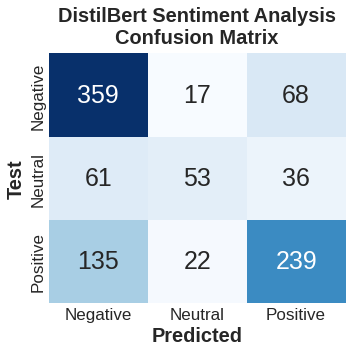

In [ ]:
conf_matrix(y_test.argmax(1),y_pred_DistilBert.argmax(1),'DistilBert Sentiment Analysis\nConfusion Matrix')

In [ ]:
print('\tClassification Report for DistilBert:\n\n',classification_report(y_test,y_pred_DistilBert, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for DistilBert:

               precision    recall  f1-score   support

    Negative       0.65      0.81      0.72       444
     Neutral       0.58      0.35      0.44       150
    Positive       0.70      0.60      0.65       396

   micro avg       0.66      0.66      0.66       990
   macro avg       0.64      0.59      0.60       990
weighted avg       0.66      0.66      0.65       990
 samples avg       0.66      0.66      0.66       990



IndexError: ignored

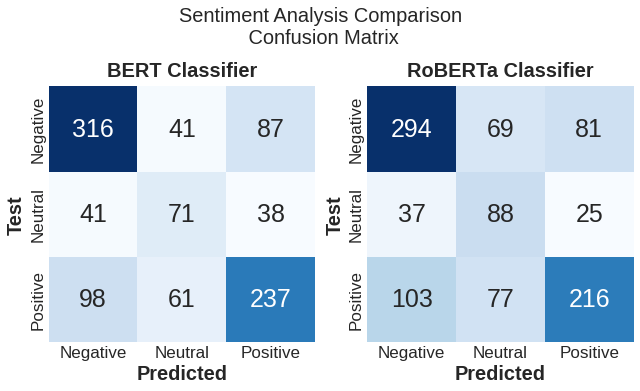

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(9,5.5))

labels = ['Negative', 'Neutral', 'Positive']
plt.suptitle('Sentiment Analysis Comparison\n Confusion Matrix', fontsize=20)


sns.heatmap(confusion_matrix(y_test.argmax(1),y_pred_bert.argmax(1)), annot=True, cmap="Blues", fmt='g', cbar=False, ax=ax[0], annot_kws={"size":25})

ax[0].set_title('BERT Classifier', fontsize=20)
ax[0].set_yticklabels(labels, fontsize=17);
ax[0].set_xticklabels(labels, fontsize=17);
ax[0].set_ylabel('Test', fontsize=20)
ax[0].set_xlabel('Predicted', fontsize=20)

sns.heatmap(confusion_matrix(y_test.argmax(1),y_pred_roberta.argmax(1)), annot=True, cmap="Blues", fmt='g', cbar=False, ax=ax[1], annot_kws={"size":25})
ax[1].set_title('RoBERTa Classifier', fontsize=20)
ax[1].set_yticklabels(labels, fontsize=17);
ax[1].set_xticklabels(labels, fontsize=17);
ax[1].set_ylabel('Test', fontsize=20)
ax[1].set_xlabel('Predicted', fontsize=20)

sns.heatmap(confusion_matrix(y_test.argmax(1),y_pred_DistilBert.argmax(1)), annot=True, cmap="Blues", fmt='g', cbar=False, ax=ax[2], annot_kws={"size":25})

ax[2].set_title('DistilBert Classifier', fontsize=20)
ax[2].set_yticklabels(labels, fontsize=17);
ax[2].set_xticklabels(labels, fontsize=17);
ax[2].set_ylabel('Test', fontsize=20)
ax[2].set_xlabel('Predicted', fontsize=20)

plt.show()